In [7]:
import prepara_kmodes_df as prep
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = prep.exec()

C:\Users\lucia\Tese_Marilia\CodigoIPYNB\tratamento_dados.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Munic Empr'][i] = df['Munic Empr'][i][:2]


In [3]:
df.head()

,Agente Causador Acidente,CBO,CID-10,CNAE2.0 Empregador,CNAE2.0 Empregador.1,Emitente CAT,Espécie do benefício,Filiação Segurado,Indica acidente,Munic Empr,Natureza da Lesão,Origem de Cadastramento CAT,Parte Corpo Atingida,Sexo,Tipo do Acidente,UF Munic. Empregador,Data Acidente.1,Idade
0,M,Instaladores e reparadores de linhas e cabos e...,"Lesões, envenenamentos e algumas outras conseq...",4329,Obras de Instalacoes,Empregador,Pa,Empregado,Não,43,"Contusao, Esmagament",Internet,Braco (Entre O Punho,Masculino,Típico,43,1,31-40
1,M,Ajudantes de obras,"Lesões, envenenamentos e algumas outras conseq...",4213,Obras de Urbanizacao,Empregador,Pa,Empregado,Não,31,Fratura,Internet,Quadris (Inclusive P,Masculino,Típico,31,1,41-50
2,M,Trabalhadores da construção civil e obras públ...,Doenças do sistema osteomuscular e do tecido c...,4399,Servicos Especializa,Empregador,Pa,Empregado,Não,42,Inflamacao de Articu,Internet,Antebraco (Entre O P,Masculino,Típico,42,2,31-40
4,M,Técnicos em eletroeletrônica e fotônica,"Lesões, envenenamentos e algumas outras conseq...",4321,Instalacoes Eletrica,Empregador,Pa,Empregado,Não,35,"Distensao, Torcao",Internet,Pe (Exceto Artelhos),Masculino,Típico,35,2,41-50
5,M,Eletricistas eletrônicos de manutenção industr...,"Lesões, envenenamentos e algumas outras conseq...",4329,Obras de Instalacoes,Empregador,Pa,Empregado,Não,35,Amputacao ou Enuclea,Internet,Dedo,Masculino,Típico,35,6,31-40


### Aplicando somente para construção civil

In [4]:
df = df.loc[df['CNAE2.0 Empregador'] == 4120, :]

# Para todos os tipos de acidentes

In [59]:
df_categorico = df.drop(['Agente  Causador  Acidente', 'CNAE2.0 Empregador.1','CNAE2.0 Empregador', 'CID-10', 'UF Munic. Empregador','Emitente CAT', 'Espécie do benefício', 
                         'Data Acidente.1', 'Filiação Segurado', 'Indica acidente', 'Munic Empr', 'Sexo','Origem de Cadastramento CAT'], axis=1)
df_categorico.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19328 entries, 7 to 52767
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CBO                   19328 non-null  object
 1   Natureza da Lesão     19328 non-null  object
 2   Parte Corpo Atingida  19328 non-null  object
 3   Tipo do Acidente      19328 non-null  object
 4   Idade                 19328 non-null  object
dtypes: object(5)
memory usage: 906.0+ KB


In [60]:
from kmodes.kmodes import KModes

# IMPLEMENTAR
# Elbow curve to find optimal K - Demorou em torno de 5min
cost = []
K = range(5,81,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df_categorico)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3803, cost: 41626.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 4236, cost: 40542.0
Run 2, iteration: 2/100, moves: 42, cost: 40542.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 3222, cost: 41007.0
Run 3, iteration: 2/100, moves: 195, cost: 41007.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 5299, cost: 42232.0
Run 4, iteration: 2/100, moves: 1893, cost: 42232.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 4489, cost: 41845.0
Best run was number 2
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6397, cost: 36826.0
Init: initializing centroids
Init

Run 5, iteration: 1/100, moves: 5044, cost: 28100.0
Run 5, iteration: 2/100, moves: 1270, cost: 28100.0
Best run was number 2
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2723, cost: 27427.0
Run 1, iteration: 2/100, moves: 568, cost: 27321.0
Run 1, iteration: 3/100, moves: 6, cost: 27321.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 4658, cost: 27139.0
Run 2, iteration: 2/100, moves: 320, cost: 27139.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2908, cost: 27788.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 4687, cost: 26754.0
Run 4, iteration: 2/100, moves: 760, cost: 26754.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 4783, cost: 27544.0
Run 5, itera

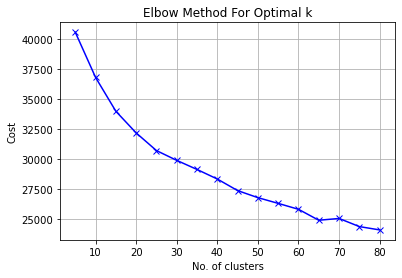

In [61]:
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
hoje = datetime.date.today()
plt.grid()
nome = 'Apresentação\\V1\\elbow-todos-tipos' + str(hoje)
plt.savefig(nome)
plt.show()

### Escolhendo o número de Clusters

In [62]:
n_clusters_escolhidos = 65
kmode = KModes(n_clusters=n_clusters_escolhidos, init = "random", n_init = 5, verbose=1)
kmode.fit_predict(df_categorico)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2832, cost: 26120.0
Run 1, iteration: 2/100, moves: 289, cost: 26120.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 3628, cost: 25424.0
Run 2, iteration: 2/100, moves: 424, cost: 25327.0
Run 2, iteration: 3/100, moves: 46, cost: 25327.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 3119, cost: 26306.0
Run 3, iteration: 2/100, moves: 201, cost: 26109.0
Run 3, iteration: 3/100, moves: 129, cost: 26109.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 4664, cost: 25718.0
Run 4, iteration: 2/100, moves: 550, cost: 25591.0
Run 4, iteration: 3/100, moves: 138, cost: 25591.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 3471

array([ 7, 28,  4, ...,  4,  7,  9], dtype=uint16)

In [63]:
data_df = pd.DataFrame(kmode.cluster_centroids_)
data_df.columns = list(df_categorico.columns)

In [64]:
lista = list(range(kmode.n_clusters))
for valor in kmode.labels_:
    lista[valor] = lista[valor] + 1
data_df['Ocorrencias de Acidentes do Centroide'] = lista

In [65]:
# Checando o custo do Cluster criado
print("Custo modelo: ",kmode.cost_)

Custo modelo:  25327.0


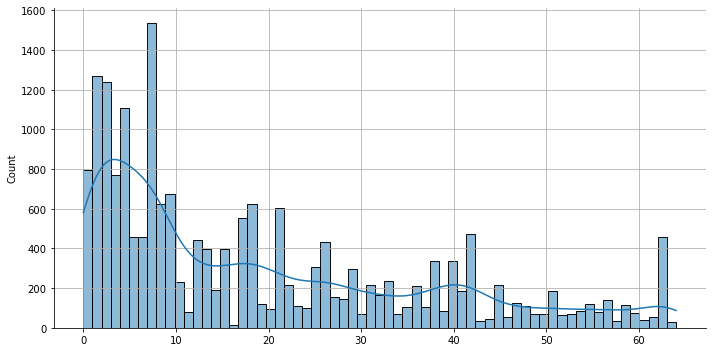

In [69]:
sns.displot(kmode.labels_, kde=True, bins=kmode.n_clusters, height=5, aspect=2)
plt.grid()
hoje = datetime.date.today()
nome = 'Apresentação\\V1\\centroides-todos-tipos1' + str(hoje)
plt.savefig(nome)
plt.show()

In [70]:
hoje = datetime.date.today()
nome = 'kmodes\\centroides-todos-tipos' + str(hoje) + '.csv'
data_df.to_csv(nome)

# Para acidentes = Típicos

In [47]:
df_tipicos = df.loc[df['Tipo do Acidente'] == 'Típico',:]

df_categorico = df_tipicos.drop(['Agente  Causador  Acidente', 'CNAE2.0 Empregador.1','CNAE2.0 Empregador', 'CID-10', 'UF Munic. Empregador','Emitente CAT', 'Espécie do benefício', 
                         'Data Acidente.1', 'Filiação Segurado', 'Indica acidente', 'Munic Empr', 'Sexo','Tipo do Acidente', 'Origem de Cadastramento CAT'], axis=1)
df_categorico.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16484 entries, 7 to 52763
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CBO                   16484 non-null  object
 1   Natureza da Lesão     16484 non-null  object
 2   Parte Corpo Atingida  16484 non-null  object
 3   Idade                 16484 non-null  object
dtypes: object(4)
memory usage: 643.9+ KB


In [48]:
# IMPLEMENTAR
# Elbow curve to find optimal K - Demorou em torno de 5min
cost = []
K = range(5,81,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df_categorico)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4261, cost: 33887.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 5503, cost: 32112.0
Run 2, iteration: 2/100, moves: 32, cost: 32112.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 3788, cost: 33043.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 3842, cost: 32753.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 3405, cost: 31940.0
Best run was number 5
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3956, cost: 28632.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 4533, cost: 28989.0
Run 

Starting iterations...
Run 3, iteration: 1/100, moves: 3043, cost: 20278.0
Run 3, iteration: 2/100, moves: 244, cost: 20278.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2308, cost: 20816.0
Run 4, iteration: 2/100, moves: 203, cost: 20816.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1640, cost: 20898.0
Run 5, iteration: 2/100, moves: 254, cost: 20898.0
Best run was number 3
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3403, cost: 19841.0
Run 1, iteration: 2/100, moves: 11, cost: 19841.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 3725, cost: 19635.0
Run 2, iteration: 2/100, moves: 124, cost: 19635.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 4635, cos

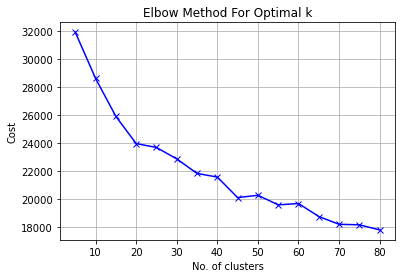

In [49]:
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.grid()
nome = 'Apresentação\\V1\\elbow-tipicos' + str(hoje)
plt.savefig(nome)
plt.show()

### Escolhendo o número de Clusters

In [39]:
n_clusters_escolhidos = 40
kmode = KModes(n_clusters=n_clusters_escolhidos, init = "random", n_init = 5, verbose=1)
kmode.fit_predict(df_categorico)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3841, cost: 15176.0
Run 1, iteration: 2/100, moves: 151, cost: 15161.0
Run 1, iteration: 3/100, moves: 4, cost: 15161.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2597, cost: 16475.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1552, cost: 16058.0
Run 3, iteration: 2/100, moves: 115, cost: 16046.0
Run 3, iteration: 3/100, moves: 29, cost: 16046.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 3034, cost: 15357.0
Run 4, iteration: 2/100, moves: 593, cost: 15357.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 3909, cost: 15864.0
Run 5, iteration: 2/100, moves: 260, cost: 15744.0
Run 5, iteration: 3/100, moves: 14, c

array([3, 3, 8, ..., 1, 1, 2], dtype=uint16)

In [40]:
data_df = pd.DataFrame(kmode.cluster_centroids_)
data_df.columns = list(df_categorico.columns)

In [ ]:
lista = list(range(kmode.n_clusters))
for valor in kmode.labels_:
    lista[valor] = lista[valor] + 1
data_df['Ocorrencias de Acidentes do Centroide'] = lista

In [41]:
# Checando o custo do Cluster criado
print("Custo modelo: ",kmode.cost_)

Custo modelo:  15161.0


In [ ]:
sns.displot(kmode.labels_, kde=True, bins=kmode.n_clusters, height=5, aspect=2)
plt.grid()
hoje = datetime.date.today()
nome = 'Apresentação\\V1\\centroides-tipico' + str(hoje)
plt.savefig(nome)
plt.show()

In [42]:
hoje = datetime.date.today()
nome = 'kmodes\\centroides-tipicos' + str(hoje) + '.csv'
data_df.to_csv(nome)

# Para acidentes = Trajeto

In [50]:
df_trajeto = df.loc[df['Tipo do Acidente'] == 'Trajeto',:]

df_categorico = df_trajeto.drop(['Agente  Causador  Acidente', 'CNAE2.0 Empregador.1','CNAE2.0 Empregador', 'CID-10', 'UF Munic. Empregador','Emitente CAT', 'Espécie do benefício', 
                         'Data Acidente.1', 'Filiação Segurado', 'Indica acidente', 'Munic Empr', 'Sexo','Tipo do Acidente', 'Origem de Cadastramento CAT'], axis=1)
df_categorico.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2702 entries, 23 to 52767
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CBO                   2702 non-null   object
 1   Natureza da Lesão     2702 non-null   object
 2   Parte Corpo Atingida  2702 non-null   object
 3   Idade                 2702 non-null   object
dtypes: object(4)
memory usage: 105.5+ KB


In [51]:
# IMPLEMENTAR
# Elbow curve to find optimal K - Demorou em torno de 5min
cost = []
K = range(5,81,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df_categorico)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 476, cost: 5564.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 874, cost: 5570.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 248, cost: 5959.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 673, cost: 5704.0
Run 4, iteration: 2/100, moves: 674, cost: 5625.0
Run 4, iteration: 3/100, moves: 34, cost: 5625.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 408, cost: 5568.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 600, cost: 4999.0
Run 1, iteration: 2/100, moves: 41, cost: 4999.0
Init: initializing centroids
Init: initializing cl

Starting iterations...
Run 2, iteration: 1/100, moves: 373, cost: 3696.0
Run 2, iteration: 2/100, moves: 48, cost: 3696.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 477, cost: 3650.0
Run 3, iteration: 2/100, moves: 21, cost: 3650.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 399, cost: 3715.0
Run 4, iteration: 2/100, moves: 176, cost: 3702.0
Run 4, iteration: 3/100, moves: 13, cost: 3702.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 632, cost: 3684.0
Run 5, iteration: 2/100, moves: 98, cost: 3644.0
Run 5, iteration: 3/100, moves: 9, cost: 3644.0
Best run was number 5
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 598, cost: 3525.0
Run 1, iteration: 2/100, moves: 39, cost: 3523.0
Run 1, iteration: 3/100, moves: 0, cost: 3

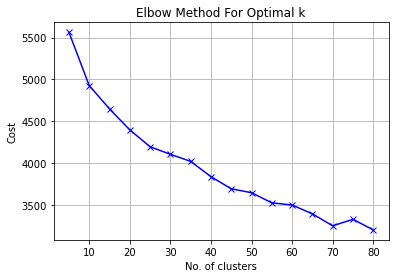

In [52]:
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.grid()
nome = 'Apresentação\\V1\\elbow-trajetos' + str(hoje)
plt.savefig(nome)
plt.show()

### Escolhendo o número de Clusters

In [21]:
n_clusters_escolhidos = 25
kmode = KModes(n_clusters=n_clusters_escolhidos, init = "random", n_init = 5, verbose=1)
kmode.fit_predict(df_categorico)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1578, cost: 13775.0
Run 1, iteration: 2/100, moves: 20, cost: 13775.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 857, cost: 14307.0
Run 2, iteration: 2/100, moves: 615, cost: 14083.0
Run 2, iteration: 3/100, moves: 126, cost: 14083.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 895, cost: 14227.0
Run 3, iteration: 2/100, moves: 176, cost: 14201.0
Run 3, iteration: 3/100, moves: 4, cost: 14201.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2436, cost: 13950.0
Run 4, iteration: 2/100, moves: 123, cost: 13950.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1504, cost: 14239.0
Run 5, iteration: 2/100, moves: 493, co

array([21, 11, 11, ...,  6, 11, 18], dtype=uint16)

In [22]:
data_df = pd.DataFrame(kmode.cluster_centroids_)
data_df.columns = list(df_categorico.columns)

In [ ]:
lista = list(range(kmode.n_clusters))
for valor in kmode.labels_:
    lista[valor] = lista[valor] + 1
data_df['Ocorrencias de Acidentes do Centroide'] = lista

In [23]:
# Checando o custo do Cluster criado
print("Custo modelo: ",kmode.cost_)

Custo modelo:  13775.0


In [ ]:
sns.displot(kmode.labels_, kde=True, bins=kmode.n_clusters, height=5, aspect=2)
plt.grid()
hoje = datetime.date.today()
nome = 'Apresentação\\V1\\centroides-trajeto' + str(hoje)
plt.savefig(nome)
plt.show()

In [24]:
hoje = datetime.date.today()
nome = 'kmodes\\centroides-trajetos' + str(hoje) + '.csv'
data_df.to_csv(nome)

# Para acidentes = Doenças

In [53]:
df_doenca = df.loc[df['Tipo do Acidente'] == 'Doença',:]

df_categorico = df_doenca.drop(['Agente  Causador  Acidente', 'CNAE2.0 Empregador.1','CNAE2.0 Empregador', 'CID-10', 'UF Munic. Empregador','Emitente CAT', 'Espécie do benefício', 
                         'Data Acidente.1', 'Filiação Segurado', 'Indica acidente', 'Munic Empr', 'Sexo','Tipo do Acidente', 'Origem de Cadastramento CAT'], axis=1)
df_categorico.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 647 to 52324
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CBO                   142 non-null    object
 1   Natureza da Lesão     142 non-null    object
 2   Parte Corpo Atingida  142 non-null    object
 3   Idade                 142 non-null    object
dtypes: object(4)
memory usage: 5.5+ KB


In [54]:
# IMPLEMENTAR
# Elbow curve to find optimal K - Demorou em torno de 5min
cost = []
K = range(5,81,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df_categorico)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 39, cost: 298.0
Run 1, iteration: 2/100, moves: 13, cost: 298.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 11, cost: 294.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 38, cost: 301.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 18, cost: 303.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 50, cost: 307.0
Run 5, iteration: 2/100, moves: 18, cost: 307.0
Best run was number 2
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 24, cost: 269.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 36

Starting iterations...
Run 5, iteration: 1/100, moves: 20, cost: 158.0
Run 5, iteration: 2/100, moves: 5, cost: 158.0
Best run was number 3
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 24, cost: 143.0
Run 1, iteration: 2/100, moves: 1, cost: 143.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 20, cost: 144.0
Run 2, iteration: 2/100, moves: 2, cost: 144.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 20, cost: 147.0
Run 3, iteration: 2/100, moves: 0, cost: 147.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 28, cost: 150.0
Run 4, iteration: 2/100, moves: 2, cost: 150.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 14, cost: 139.0
Run 5, iteration: 2/100, moves: 

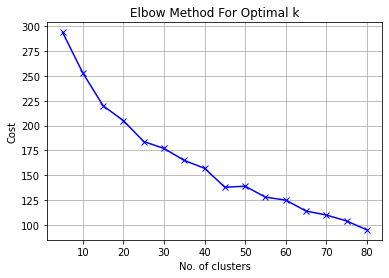

In [55]:
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.grid()
nome = 'Apresentação\\V1\\elbow-doenca' + str(hoje)
plt.savefig(nome)
plt.show()

### Escolhendo o número de Clusters

In [28]:
n_clusters_escolhidos = 25
kmode = KModes(n_clusters=n_clusters_escolhidos, init = "random", n_init = 5, verbose=1)
kmode.fit_predict(df_categorico)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 67, cost: 661.0
Run 1, iteration: 2/100, moves: 10, cost: 661.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 60, cost: 702.0
Run 2, iteration: 2/100, moves: 3, cost: 700.0
Run 2, iteration: 3/100, moves: 0, cost: 700.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 94, cost: 692.0
Run 3, iteration: 2/100, moves: 1, cost: 692.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 91, cost: 697.0
Run 4, iteration: 2/100, moves: 28, cost: 687.0
Run 4, iteration: 3/100, moves: 21, cost: 678.0
Run 4, iteration: 4/100, moves: 2, cost: 678.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 131, cost: 739.0
Run 5, iteration: 2/100, mo

array([ 7,  6,  3, 19, 17, 10,  8, 19,  0, 11, 11,  0,  0, 19,  1,  1, 11,
        0, 20, 24,  6,  8, 17, 16,  9,  0,  1,  0,  3, 11,  6,  0,  6,  8,
        3,  6, 22,  7,  3, 19, 19,  0,  6,  4,  4,  0,  6,  0,  0, 19, 24,
        0, 10, 19,  8,  3,  0,  5,  8,  0,  0,  6, 22,  5,  3, 17, 17,  0,
        8, 20, 19,  1, 16, 14, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 19, 16,  1,  0,  0,  0,
        7, 10,  6,  0,  1,  0,  0,  7,  8,  8, 16, 16,  0,  0,  0,  2,  3,
        0, 12, 16,  5, 20, 16, 15, 15, 15, 15,  0,  0,  5, 16,  5,  7, 16,
       19,  0,  1, 20,  0,  0,  9, 16,  0, 16,  8,  1,  0, 24, 19,  0, 19,
        6,  3,  3, 19, 11,  5,  5, 19, 19,  7,  0,  0, 19,  5,  0, 16, 16,
        9,  4, 23, 16,  0, 22, 22, 22, 12,  4,  6,  1, 22, 22,  6,  5,  0,
       10, 10,  4,  0, 16,  1,  0,  1,  0,  3,  3,  0,  5,  1, 10,  6,  3,
        0, 10,  3,  5,  8,  2,  7,  0,  5,  3,  1,  4,  2,  8, 10,  6,  0,
       19,  0,  6, 22,  6

In [29]:
data_df = pd.DataFrame(kmode.cluster_centroids_)
data_df.columns = list(df_categorico.columns)

In [ ]:
lista = list(range(kmode.n_clusters))
for valor in kmode.labels_:
    lista[valor] = lista[valor] + 1
data_df['Ocorrencias de Acidentes do Centroide'] = lista

In [30]:
# Checando o custo do Cluster criado
print("Custo modelo: ",kmode.cost_)

Custo modelo:  661.0


In [ ]:
sns.displot(kmode.labels_, kde=True, bins=kmode.n_clusters, height=5, aspect=2)
plt.grid()
hoje = datetime.date.today()
nome = 'Apresentação\\V1\\centroides-doenca' + str(hoje)
plt.savefig(nome)
plt.show()

In [31]:
hoje = datetime.date.today()
nome = 'kmodes\\centroides-doencas' + str(hoje) + '.csv'
data_df.to_csv(nome)

## Para acidentes = Mortes

In [56]:
df_morte = df.loc[df['Indica acidente'] == 'Sim',:]

df_categorico = df_morte.drop(['Agente  Causador  Acidente', 'CNAE2.0 Empregador.1','CNAE2.0 Empregador', 'CID-10', 'UF Munic. Empregador','Emitente CAT', 'Espécie do benefício', 
                         'Data Acidente.1', 'Filiação Segurado', 'Indica acidente', 'Munic Empr', 'Sexo','Tipo do Acidente', 'Origem de Cadastramento CAT'], axis=1)
df_categorico.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 450 to 52264
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CBO                   138 non-null    object
 1   Natureza da Lesão     138 non-null    object
 2   Parte Corpo Atingida  138 non-null    object
 3   Idade                 138 non-null    object
dtypes: object(4)
memory usage: 5.4+ KB


In [57]:
# IMPLEMENTAR
# Elbow curve to find optimal K - Demorou em torno de 5min
cost = []
K = range(5,81,3)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df_categorico)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 33, cost: 259.0
Run 1, iteration: 2/100, moves: 12, cost: 259.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 38, cost: 253.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 27, cost: 267.0
Run 3, iteration: 2/100, moves: 0, cost: 267.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 26, cost: 256.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 19, cost: 272.0
Best run was number 2
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 37, cost: 230.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 15,

Run 2, iteration: 2/100, moves: 1, cost: 151.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 36, cost: 147.0
Run 3, iteration: 2/100, moves: 4, cost: 147.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 47, cost: 141.0
Run 4, iteration: 2/100, moves: 7, cost: 141.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 26, cost: 140.0
Run 5, iteration: 2/100, moves: 4, cost: 141.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 22, cost: 147.0
Run 1, iteration: 2/100, moves: 2, cost: 147.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 18, cost: 138.0
Run 2, iteration: 2/100, moves: 0, cost: 138.0
Init: initializing centroids
Init: initializing clusters

Starting iterations...
Run 4, iteration: 1/100, moves: 19, cost: 101.0
Run 4, iteration: 2/100, moves: 3, cost: 100.0
Run 4, iteration: 3/100, moves: 1, cost: 100.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 21, cost: 102.0
Run 5, iteration: 2/100, moves: 1, cost: 102.0
Best run was number 2
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 22, cost: 101.0
Run 1, iteration: 2/100, moves: 7, cost: 99.0
Run 1, iteration: 3/100, moves: 0, cost: 99.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 9, cost: 91.0
Run 2, iteration: 2/100, moves: 0, cost: 91.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 26, cost: 100.0
Run 3, iteration: 2/100, moves: 2, cost: 100.0
Init: initializing centroids
Init: initializing clusters
Starting itera

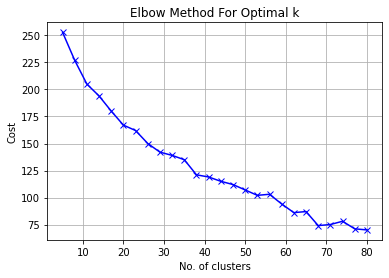

In [58]:
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.grid()
nome = 'Apresentação\\V1\\elbow-morte' + str(hoje)
plt.savefig(nome)
plt.show()

### Escolhendo o número de Clusters

In [35]:
n_clusters_escolhidos = 28
kmode = KModes(n_clusters=n_clusters_escolhidos, init = "random", n_init = 5, verbose=1)
kmode.fit_predict(df_categorico)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 44, cost: 578.0
Run 1, iteration: 2/100, moves: 0, cost: 578.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 51, cost: 566.0
Run 2, iteration: 2/100, moves: 13, cost: 566.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 46, cost: 571.0
Run 3, iteration: 2/100, moves: 1, cost: 571.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 59, cost: 586.0
Run 4, iteration: 2/100, moves: 1, cost: 586.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 76, cost: 555.0
Run 5, iteration: 2/100, moves: 30, cost: 554.0
Run 5, iteration: 3/100, moves: 1, cost: 554.0
Best run was number 5


array([11,  2,  4, 21,  3, 18, 13,  0, 26,  3,  8, 12, 26, 17,  0,  3,  2,
       11,  0, 19,  2,  6,  5,  1, 22,  5,  0,  7,  8,  5,  1,  0,  2,  1,
       15,  2,  8,  3,  1,  0,  0,  3,  5, 19,  2, 11, 21,  0,  0, 15,  5,
       13, 27,  3, 22, 26,  5,  3,  1, 27, 27,  0,  2,  2,  0,  2,  4,  0,
        0, 18,  7,  2, 18, 18,  0,  2,  7, 20,  5, 10, 13,  7,  7,  7, 11,
        3,  0,  3,  2,  3,  2,  0, 15, 21, 26, 24,  0,  1,  0, 12, 12, 12,
       26,  0,  2, 26, 12,  0,  0, 26,  1,  7, 19,  5,  5, 15, 15, 15, 11,
       24, 12,  1,  2,  2, 18,  0,  9,  1,  8,  2,  5, 12,  5,  8, 21,  8,
        1,  8,  1, 14,  1,  9, 15,  2,  6,  1, 12,  0,  1, 23,  2, 12,  2,
        3,  0, 24,  2,  0,  0,  1, 11,  5,  5,  1,  2,  2, 26,  9, 12, 27,
        7,  9,  9, 22, 24,  2,  0,  0,  5,  0,  2,  7,  0,  2,  3,  8,  1,
        5,  0,  0, 10,  4,  7,  2,  1,  0,  1,  9,  1, 10,  0, 11,  2,  2,
        5,  7,  0,  2,  6,  9,  8,  2,  7,  2,  2,  4,  4, 24,  2, 26,  5,
        0,  5,  5,  8, 13

In [36]:
data_df = pd.DataFrame(kmode.cluster_centroids_)
data_df.columns = list(df_categorico.columns)

In [ ]:
lista = list(range(kmode.n_clusters))
for valor in kmode.labels_:
    lista[valor] = lista[valor] + 1
data_df['Ocorrencias de Acidentes do Centroide'] = lista

In [37]:
# Checando o custo do Cluster criado
print("Custo modelo: ",kmode.cost_)

Custo modelo:  554.0


In [ ]:
sns.displot(kmode.labels_, kde=True, bins=kmode.n_clusters, height=5, aspect=2)
plt.grid()
hoje = datetime.date.today()
nome = 'Apresentação\\V1\\centroides-morte' + str(hoje)
plt.savefig(nome)
plt.show()

In [38]:
hoje = datetime.date.today()
nome = 'kmodes\\centroides-mortes' + str(hoje) + '.csv'
data_df.to_csv(nome)